In [2]:
#import libraries
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('movies_2.csv') # Gathering data

#df.head() # See first few lines to ensure it imported correctly

df.info() # Can't get shape using shape method as it is a tuple. So using info instead. 
# This also gives number of columns and data type

#df.isnull().sum() #shows how many null entries are in which columns (but not where)

# check for MPAA Rating, Budget, Gross, Release Date, Genre, Runtime, Rating and Rating Count columns how many NaN we have

# understanding which kind of information each column represents (Dtype shows this)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MovieID       616 non-null    int64  
 1   Title         615 non-null    object 
 2   MPAA Rating   615 non-null    object 
 3   Budget        615 non-null    float64
 4   Gross         615 non-null    float64
 5   Release Date  615 non-null    object 
 6   Genre         615 non-null    object 
 7   Runtime       615 non-null    float64
 8   Rating        508 non-null    float64
 9   Rating Count  508 non-null    float64
 10  Summary       496 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 53.1+ KB


In [4]:
# Remove all irrelevant data in the dataset. Get rid of the Summary column
df.drop(["Summary"], axis = 1, inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MovieID       616 non-null    int64  
 1   Title         615 non-null    object 
 2   MPAA Rating   615 non-null    object 
 3   Budget        615 non-null    float64
 4   Gross         615 non-null    float64
 5   Release Date  615 non-null    object 
 6   Genre         615 non-null    object 
 7   Runtime       615 non-null    float64
 8   Rating        508 non-null    float64
 9   Rating Count  508 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 48.2+ KB


In [9]:
# Two methods for showing duplicates. First one 
titles = df["Title"]
df[titles.isin(titles[titles.duplicated()])].sort_values("Title")

#second one is a little more "advanced". The underscore is a placeholder for an argument, where we don't want to use it for anything in a lambda-like expression.
#pd.concat(g for _, g in df.groupby("Title") if len(g) > 1)

,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count
65,66,Aladdin,G,28000000.0,5.040502e+08,1992-11-25,Animation,90.0,8.0,336384.0
609,610,Aladdin,PG,183000000.0,1.049000e+09,2019-05-08,Fantasy,128.0,NaN,NaN
46,47,Beauty and the Beast,PG,25000000.0,3.773506e+08,1991-11-13,Animation,84.0,8.0,397467.0
565,566,Beauty and the Beast,PG,160000000.0,1.262886e+09,2017-03-16,Drama,129.0,NaN,NaN
195,196,Godzilla,PG-13,130000000.0,3.790143e+08,1998-05-20,Thriller,139.0,5.4,174600.0
504,505,Godzilla,PG-13,160000000.0,5.290761e+08,2014-05-14,Thriller,123.0,6.4,359438.0
98,99,Jurassic Park III,PG-13,93000000.0,3.688000e+08,2001-07-16,Thriller,92.0,8.9,1690474.0
249,250,Jurassic Park III,PG-13,93000000.0,3.687808e+08,2001-07-18,Adventure,92.0,5.9,280110.0
21,22,Teenage Mutant Ninja Turtles,PG,13500000.0,2.020000e+08,1990-03-30,Action,93.0,6.8,79806.0
501,502,Teenage Mutant Ninja Turtles,PG-13,125000000.0,4.772000e+08,2014-08-07,Action,101.0,5.8,194073.0


In [44]:
#df[df.isnull().any(axis=1)] #to show all NaN through the entire DataFrame. isna does the exact same thing, originally 
#came from R where they are different. 
df[df['Rating'].isnull()] #could be used to look under a specific column. Here we see last row is full of NaNs.

,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count
486,487,Fast & Furious 6,PG-13,160000000.0,7.886798e+08,2013-05-06,Action,130.0,NaN,NaN
489,490,Oz: The Great and Powerful,PG,200000000.0,4.918685e+08,2013-03-07,Drama,130.0,NaN,NaN
510,511,Maleficent,PG,180000000.0,7.585398e+08,2014-05-28,Fantasy,97.0,NaN,NaN
511,512,The Amazing Spider-Man 2,PG-13,200000000.0,7.057174e+08,2014-04-16,Action,142.0,NaN,NaN
512,513,Transformers: Age of Extinction,PG-13,210000000.0,1.091405e+09,2014-06-25,Action,165.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
610,611,Godzilla: King of the Monsters,PG-13,200000000.0,3.859000e+08,2019-05-13,Adventure,132.0,NaN,NaN
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,NaN,NaN
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,NaN,NaN
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,NaN,NaN


In [36]:
#df.drop([615], axis = 0, inplace = True) #axis=0 tells it to look in Index, not columns. inplace is boolean, works on copy if false, else works on actual dataset.
#df.info() #confirming it has been removed.
df.tail() #confirming that it has been removed.


,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count
610,611,Godzilla: King of the Monsters,PG-13,200000000.0,3.859000e+08,2019-05-13,Adventure,132.0,NaN,NaN
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,NaN,NaN
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,NaN,NaN
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,NaN,NaN
614,615,Avengers: Endgame,PG-13,356000000.0,2.796000e+09,2019-04-22,Action,181.0,NaN,NaN


In [50]:
print(sorted(df['Genre'].unique())) #using .unique to see exactly which genres are present. Checking to make sure spelling etc is coherent across the dataset to avoid spurious subcategories.
#can lso use numpy as that is what is used in background anyway. In which case np.sort(df.Genre.unique()) or np.sort(df['Genre'].unique())

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western']


In [56]:
#Convert Budget and Gross into float type (use astype() method). Although they were already Float.
#df['Budget'] = df['Budget'].astype(float)
#df['Gross'] = df['Gross'].astype(float)
#df.info()
df.head()


,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count
0,1,Look Who's Talking,PG-13,7500000.0,296000000.0,1989-10-12,Romance,93.0,5.9,73638.0
1,2,Driving Miss Daisy,PG,7500000.0,145793296.0,1989-12-13,Comedy,99.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000.0,71079915.0,1989-07-28,Crime,100.0,7.2,91415.0
3,4,Born on the Fourth of July,R,14000000.0,161001698.0,1989-12-20,War,145.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000.0,84431625.0,1989-04-21,Drama,107.0,7.5,101702.0


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

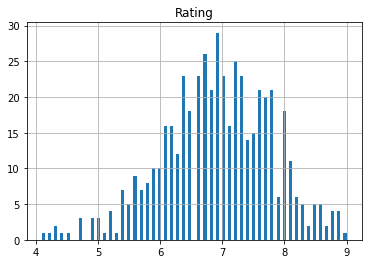

In [83]:
df.hist(column='Rating', bins=100)
#df.(column='Rating')

<AxesSubplot:xlabel='Title'>

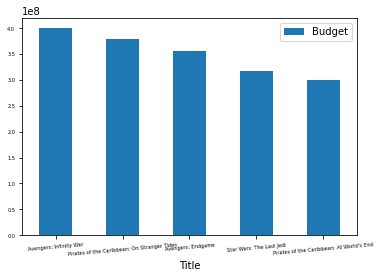

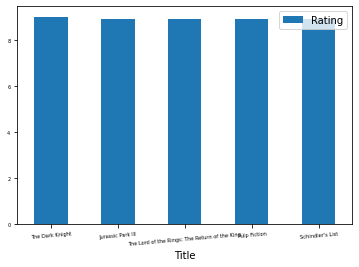

In [77]:
#for most of these we have several filters. Apply one first then the other?

#show the movies with more than 7 in Rating & greater than 50 million Gross

#show the movies with more than 7 in Rating & greater than 50 million Gross & with Parental guidance as MPAA Rating

#count of Animation movies with more than 7 in Rating (use the count() function)

#show the list of top 5 movies based on Budget. Easy shortcut by using .head().
top_5 = df.sort_values(by="Budget", ascending=False).head()
top_5.plot(x="Title", y="Budget", kind="bar", rot=5, fontsize=5)

#show the top 5 Comedy movies approved by the audience (use Rating)

#top 5 movie names by Rating
top_5 = df.sort_values(by="Rating", ascending=False).head()
top_5.plot(x="Title", y="Rating", kind="bar", rot=5, fontsize=5)

#top 3 high Gross Romance movies produced after 2000 (for the date you can use a string)

#how many Genres are present in the dataframe? (use the function value_counts() which applies to Series, not Dataframe)
Genres = pd.Series(df)

#top 5 expensive movies produced after 2000 (measured by Budget)

#most & least frequent MPAA Rating in the dataset in terms of occurances

#most and least expensive Genre (take an average of all Budget measures grouped by Genre - use groupBy() method)

#which Genre is favored the most by the people?